In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# Importing data 
df = pd.read_csv('data/breast_cancer_data.csv')

In [32]:
df = df.drop('Unnamed: 32',axis=1)
# Generating a binary 0/1 column in the dataframe for the diagnosis
df['binary_diag'] = np.where(df['diagnosis']== 'M', 1 , 0)
df = df.drop(['diagnosis','id'],axis=1)

In [33]:
# Train test split
from sklearn.model_selection import train_test_split

In [34]:
X = df.drop('binary_diag',axis=1)
y = df['binary_diag']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
# Scaling the features in my training set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import clone_model

In [63]:
# Generating and compiling the model 

model = Sequential()

# Hidden Layers
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# Output Layer
model.add(Dense(1,activation='sigmoid'))

# Compiling 
model.compile(loss='binary_crossentropy',optimizer='adam')

In [64]:
# Running model initially for a lot of epochs to force overfitting
model.fit(x=X_train,y=y_train,epochs=500,validation_data=(X_test,y_test),batch_size=128)

och 299/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0398 - val_loss: 0.1091
Epoch 300/500
4/4 [==============================] - 0s 9ms/step - loss: 0.0400 - val_loss: 0.1152
Epoch 301/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0396 - val_loss: 0.1071
Epoch 302/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0389 - val_loss: 0.1014
Epoch 303/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0440 - val_loss: 0.1001
Epoch 304/500
4/4 [==============================] - 0s 6ms/step - loss: 0.0398 - val_loss: 0.1126
Epoch 305/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0398 - val_loss: 0.1282
Epoch 306/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0419 - val_loss: 0.1169
Epoch 307/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0391 - val_loss: 0.1044
Epoch 308/500
4/4 [==============================] - 0s 7ms/step - loss: 0.0430 - val_loss: 0.0997
Epoch 309/50

In [74]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

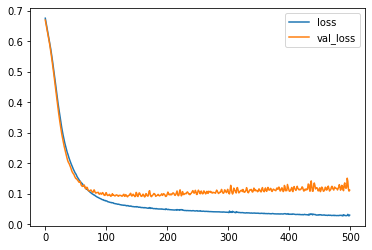

In [70]:
# Validation loss clearly diverges from training loss, therefore suggesting that we've overfit to the training data. i.e. our solution isnt a global one, its only works for the training data
losses.plot()

In [67]:
# 